# Default of Credit Card Clients Data Set
## Description

Classifies the probability of default of customers' in Taiwan described by social and financial attributes.

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | Amount of the given credit (NT dollar) | numerical |
| 2   | Gender | 1 = male, 2 = female |
| 3   | Education | 1 = graduate school, 2 = university, 3 = high school, 4 = others |
| 4   | Marital status | 1 = married, 2 = single, 3 = others |
| 5   | Age (year) | numerical |
| 6   | Payment record of september 2005 | -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, . . ., 8 = payment delay for eight months, 9 = payment delay for nine months and above. |
| 7   | Payment record of august 2005 | -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, . . ., 8 = payment delay for eight months, 9 = payment delay for nine months and above. |
| 8   | Payment record of july 2005 | -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, . . ., 8 = payment delay for eight months, 9 = payment delay for nine months and above. |
| 9   | Payment record of june 2005 | -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, . . ., 8 = payment delay for eight months, 9 = payment delay for nine months and above. |
| 10  | Payment record of may 2005 | -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, . . ., 8 = payment delay for eight months, 9 = payment delay for nine months and above. |
| 11  | Payment record of april 2005 | -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, . . ., 8 = payment delay for eight months, 9 = payment delay for nine months and above. |
| 12  | Amount of bill statement of september 2005 (NT dollar) | numerical |
| 13  | Amount of bill statement of august 2005 (NT dollar) | numerical |
| 14  | Amount of bill statement of july 2005 (NT dollar) | numerical |
| 15  | Amount of bill statement of june 2005 (NT dollar) | numerical |
| 16  | Amount of bill statement of may 2005 (NT dollar) | numerical |
| 17  | Amount of bill statement of april 2005 (NT dollar) | numerical |
| 18  | Amount of previous statement of september 2005 (NT dollar) | numerical |
| 19  | Amount of previous statement of august 2005 (NT dollar) | numerical |
| 20  | Amount of previous statement of july 2005 (NT dollar) | numerical |
| 21  | Amount of previous statement of june 2005 (NT dollar) | numerical |
| 22  | Amount of previous statement of may 2005 (NT dollar) | numerical |
| 23  | Amount of previous statement of april 2005 (NT dollar) | numerical |

## Importing the Dataset

In [3]:
import numpy as np
import pandas as pd

data = pd.read_excel("../../datasets/classification/default-of-credit-card-clients.xls", header = 1, index_col = 0)

## Preprocessing the Dataset

In [4]:
data = data.replace("?", np.nan) 
data = data.dropna() 

The following block prints the shape and column datatypes of the processed dataset.

In [5]:
print(data.shape)
print(data.dtypes)

(30000, 24)
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [7]:
from sklearn.model_selection import train_test_split

X = (data.iloc[:,:data.shape[1]-1]).to_numpy()
y = (data.iloc[:,data.shape[1]-1:data.shape[1]]).to_numpy().flatten()

# Split the data set into a 60:20:20 (train:test:val) ratio
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.80, test_size = 0.20, random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size=0.75, test_size = 0.25, random_state=0)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [9]:
# Manage imports
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
from sklearn.naive_bayes import GaussianNB
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...


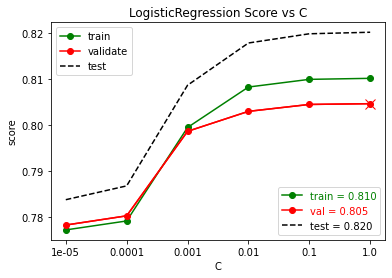

In [97]:
adjusted_parameter = 'C'
adjusted_parameter_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

LogisticRegressionEstimators = train_estimators(X_train, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter,
                                                adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                      adjusted_parameter,adjusted_parameter_values,
                      X_train, y_train, X_test, y_test, X_val, y_val)


## SVM Classification

Training SVC(C=0.01, gamma=0.0001, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, random_state=0)...
Training SVC(C=100.0, gamma=0.0001, random_state=0)...
Training SVC(C=1000.0, gamma=0.0001, random_state=0)...


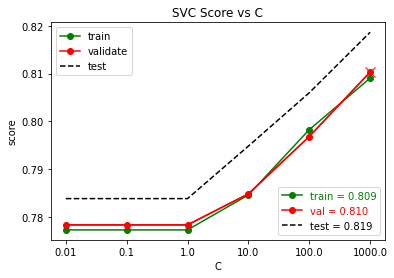

In [98]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1,1.0,10.0,100.0,1000.0]

SVMEstimators = train_estimators(X_train, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    random_state=0)

plot_estimator_scores(SVMEstimators,
                      adjusted_parameter, adjusted_parameter_values,
                      X_train, y_train, X_test, y_test, X_val, y_val)

## Decision Tree Classification

Training DecisionTreeClassifier(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=100, splitter='random', random_state=0)...


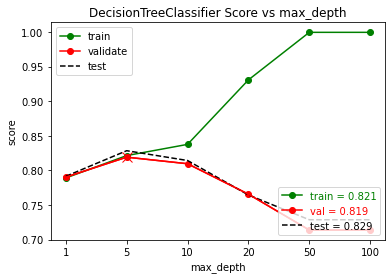

In [99]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)


## RandomForest Classification

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...


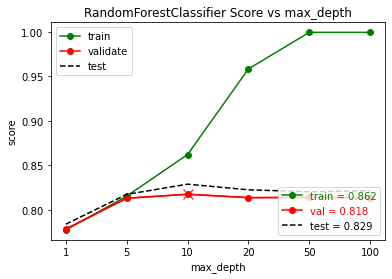

In [100]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)


## K-nearest Classification

Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...


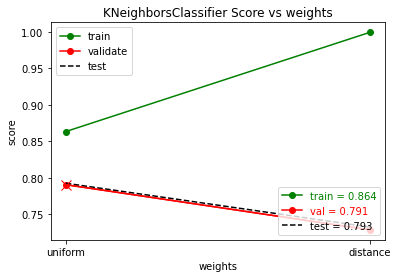

In [101]:

adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)



Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...


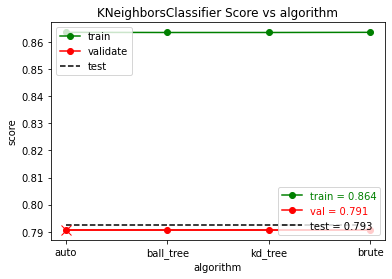

In [102]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)




## Ada Boost Classification

Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier(n_estimators=500, random_state=0)...
Training AdaBoostClassifier(n_estimators=1000, random_state=0)...
Training AdaBoostClassifier(n_estimators=5000, random_state=0)...


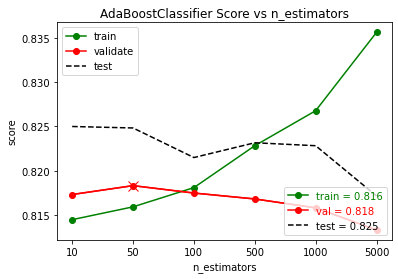

In [103]:

adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)


## Gaussian Naive Bayes Classification

In [104]:
clf = GaussianNB()
NaiveBayesEstimator=clf.fit(X_train, y_train)
NB_training_scores = NaiveBayesEstimator.score(X_train, y_train)
NB_test_scores =  NaiveBayesEstimator.score(X_test, y_test)
NB_val_scores =  NaiveBayesEstimator.score(X_val, y_val)
print(NB_training_scores,NB_val_scores,NB_test_scores)

0.575 0.5743333333333334 0.5706666666666667
